<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 4 Sprint 3 Assignment 2*
# Convolutional Neural Networks (CNNs)

# Assignment

Load a pretrained network from Keras, [ResNet50](https://tfhub.dev/google/imagenet/resnet_v1_50/classification/1) - a 50 layer deep network trained to recognize [1000 objects](https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt). Starting usage:

```python
import numpy as np

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

ResNet50 = ResNet50(weights='imagenet')
features = model.predict(x)

```

Next you will need to remove the last layer from the ResNet model. Here, we loop over the layers to use the sequential API. There are easier ways to add and remove layers using the Keras functional API, but doing so introduces other complexities. 

```python
# Remote the Last Layer of ResNEt
ResNet50._layers.pop(0)

# Out New Model
model = Sequential()

# Add Pre-trained layers of Old Model to New Model
for layer in ResNet50.layers:
    model.add(layer)

# Turn off additional training of ResNet Layers for speed of assignment
for layer in model.layers:
    layer.trainable = False

# Add New Output Layer to Model
model.add(Dense(1, activation='sigmoid'))
```

Your assignment is to apply the transfer learning above to classify images of Mountains (`./data/mountain/*`) and images of forests (`./data/forest/*`). Treat mountains as the postive class (1) and the forest images as the negative (zero). 

Steps to complete assignment: 
1. Load in Image Data into numpy arrays (`X`) 
2. Create a `y` for the labels
3. Train your model with pretrained layers from resnet
4. Report your model's accuracy

In [34]:
import numpy as np

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.models import Sequential, Model # <- May Use
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [35]:
from tensorflow.keras.models import Sequential, Model # <- May Use

In [36]:
import imageio
import matplotlib.pyplot as plt
from skimage import color, io
# from skimage.exposure import rescale_intensity

In [ ]:
model = ResNet50(weights='imagenet')

In [ ]:
# features = model.predict(x)

In [ ]:
!pip install imageio

In [ ]:
!pip install scikit-image

In [37]:
def process_img_path(img_path):
    return image.load_img(img_path, target_size=(224, 224))

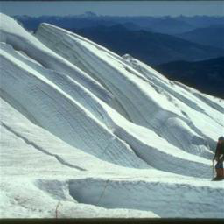

In [38]:
image.load_img('./data/mountain/cdmc181.jpg', target_size=(224,224))

In [95]:
# From Jay -- process images into x

data = []

for i in ['mountain', 'forest']:
    for file in os.listdir('./data/'+i):
#         print(file)
        if file[-3:] == 'jpg':
            path = os.path.join(f'./data/{i}/' + file)
            img = process_img_path(path)
            x = image.img_to_array(img)

            x = np.expand_dims(x, axis=0)
            
            x = preprocess_input(x)
            
            data.append(x)
#             print(x)

In [96]:
import numpy as np

x = np.asarray(data)

In [97]:
x.shape

(702, 1, 224, 224, 3)

In [98]:
x = x.reshape(702,224,224,3)

In [99]:
x.shape

(702, 224, 224, 3)

In [101]:
x[0]

array([[[ 113.061    ,   72.221    ,   30.32     ],
        [ 116.061    ,   73.221    ,   31.32     ],
        [ 116.061    ,   73.221    ,   31.32     ],
        ...,
        [ 105.061    ,   38.221    ,   -3.6800003],
        [  98.061    ,   38.221    ,    0.3199997],
        [  90.061    ,   34.221    ,    0.3199997]],

       [[ 127.061    ,   78.221    ,   33.32     ],
        [ 127.061    ,   78.221    ,   33.32     ],
        [ 128.061    ,   79.221    ,   32.32     ],
        ...,
        [ 114.061    ,   40.221    ,   -6.6800003],
        [ 108.061    ,   41.221    ,   -0.6800003],
        [ 109.061    ,   47.221    ,    8.32     ]],

       [[ 131.061    ,   75.221    ,   25.32     ],
        [ 130.061    ,   74.221    ,   24.32     ],
        [ 131.061    ,   76.221    ,   24.32     ],
        ...,
        [ 123.061    ,   41.221    ,  -14.68     ],
        [ 108.061    ,   32.221    ,  -18.68     ],
        [ 120.061    ,   50.221    ,    4.3199997]],

       ...,

      

In [63]:
# Ugh... this is left over from my old way (below) will have to run that first... or rewrite?
# Create y target vector

y = [1] * len(pic_mountain)
y_forests = [0] * len(pic_forest)

for i in y_forests:
    y.append(i)

y = np.asarray(y)

In [64]:
y.shape

(702,)

In [61]:
# # Read in Data From articles folder

# import os

# pic_forest = []

# pics = os.listdir('./data/forest')

# for filename in pics:
#     if filename[-3:] == 'jpg':
#         path = f'./data/forest/{filename}'
#         #print(path)
#         with open(path, 'rb') as data:
#             content = data.read()
# #             print(content)
#             pic_forest.append(content)
# # return image.load_img(img_path, target_size=(224,224))

In [62]:
# pic_mountain = []

# pics = os.listdir('./data/mountain')

# for filename in pics:
#     if filename[-3:] == 'jpg':
#         path = f'./data/mountain/{filename}'
#         #print(path)
#         with open(path, 'rb') as data:
#             content = data.read()
# #             print(content)
#             pic_mountain.append(content)

In [ ]:
# X = pic_mountain

# for i in pic_forest:
#     X.append(i)

In [ ]:
# # From Han: "instead of popping layers, just dont include top." 
# model = ResNet50(input_shape=(224, 224, 3), weights='imagenet', include_top=False)

In [106]:
### YOUR CODE HERE

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, GlobalAveragePooling2D

res = ResNet50(input_shape=(224, 224, 3), weights='imagenet', include_top=False)

# Remote the Last Layer of ResNE

# make all layers trainable
for layer in res.layers:
    layer.trainable = False
    
# add your head on top
x1 = res.output
x1 = GlobalAveragePooling2D()(x1)
predictions = Dense(1, activation='sigmoid')(x1)
model = Model(res.input, predictions)

In [ ]:
model.summary()

# Holy fuck!!! That's a LOT of layers!

In [73]:
def img_contains_mountain(img):
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    model = ResNet50(weights='imagenet')
    features = model.predict(x)
    results = decode_predictions(features, top=10)[0]
#     print(results)
    for entry in results:
        if entry[1] == 'mountain':
            return entry[2]
    return 0.0

[('n09193705', 'alp', 0.77681005), ('n04228054', 'ski', 0.0857278), ('n09468604', 'valley', 0.07167453), ('n09246464', 'cliff', 0.019965729), ('n09428293', 'seashore', 0.007643562), ('n04273569', 'speedboat', 0.0073817), ('n04252225', 'snowplow', 0.0056777215), ('n04252077', 'snowmobile', 0.0037484742), ('n03160309', 'dam', 0.0030769422), ('n02860847', 'bobsled', 0.0030306634)]
0.0


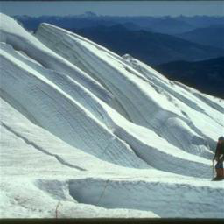

In [72]:
# looking at a couple examples here:

print(img_contains_mountain(process_img_path('./data/mountain/cdmc181.jpg')))
image.load_img('./data/mountain/cdmc181.jpg', target_size=(224,224))

In [49]:
img_contains_mountain(process_img_path('./data/mountain/land132.jpg'))

[('n09193705', 'alp', 0.9856954), ('n03792972', 'mountain_tent', 0.006313536), ('n09468604', 'valley', 0.003166605)]


0.0

In [ ]:
# Next Up: need to run the whole X through img_countains_mountain and compare to y

In [108]:
y_pred = model.predict(x)

In [109]:
y_pred.shape

(702, 1)

In [110]:
y_pred[0]

array([0.93420947], dtype=float32)

In [111]:
y_pred = np.round(y_pred, 0)
y_pred[0]

array([1.], dtype=float32)

In [112]:
y_pred = y_pred.astype(int)
y_pred[0]

array([1])

In [113]:
unique, counts = np.unique(y_pred, return_counts=True)
print(np.asarray((unique, counts)).T)

[[  0   4]
 [  1 698]]


In [118]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, stratify=y)

In [ ]:
# from sklearn.preprocessing import Normalizer

# x_train = Normalizer().fit(x_train).transform(x_train)
# x_test = Normalizer().fit(x_test).transform(x_test) # Hold off on running...

In [120]:
epochs = 10
batch_size = 10

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit Model
model.fit(x_train, y_train,
          validation_data=(x_test, y_test),
          epochs=epochs,
          batch_size=epochs,
          verbose=True
         )

Train on 526 samples, validate on 176 samples
Epoch 1/10
526/526 [==============================] - 10s 20ms/sample - loss: 0.0812 - accuracy: 0.9734 - val_loss: 0.0212 - val_accuracy: 0.9943
Epoch 2/10
526/526 [==============================] - 6s 11ms/sample - loss: 0.0354 - accuracy: 0.9886 - val_loss: 0.0129 - val_accuracy: 1.0000
Epoch 3/10
526/526 [==============================] - 6s 11ms/sample - loss: 0.0322 - accuracy: 0.9924 - val_loss: 0.0126 - val_accuracy: 1.0000
Epoch 4/10
526/526 [==============================] - 6s 11ms/sample - loss: 0.0558 - accuracy: 0.9791 - val_loss: 0.0400 - val_accuracy: 0.9886
Epoch 5/10
526/526 [==============================] - 6s 11ms/sample - loss: 0.0493 - accuracy: 0.9772 - val_loss: 0.0146 - val_accuracy: 0.9943
Epoch 6/10
526/526 [==============================] - 6s 11ms/sample - loss: 0.0327 - accuracy: 0.9886 - val_loss: 0.0097 - val_accuracy: 1.0000
Epoch 7/10
526/526 [==============================] - 6s 11ms/sample - loss: 0.0425

In [119]:
x_train[0]

array([[[ 5.0609970e+00, -3.5778999e+01, -7.7680000e+01],
        [-4.9390030e+00, -4.3778999e+01, -8.7680000e+01],
        [-4.9390030e+00, -4.3778999e+01, -8.7680000e+01],
        ...,
        [ 7.6060997e+01,  2.9221001e+01, -6.8000031e-01],
        [ 7.5060997e+01,  2.8221001e+01, -1.6800003e+00],
        [ 7.4060997e+01,  2.6221001e+01, -6.8000031e-01]],

       [[ 6.0997009e-02, -4.1778999e+01, -8.7680000e+01],
        [ 3.0609970e+00, -3.5778999e+01, -8.2680000e+01],
        [ 1.0609970e+00, -3.6778999e+01, -8.5680000e+01],
        ...,
        [ 7.1060997e+01,  2.4221001e+01, -5.6800003e+00],
        [ 7.3060997e+01,  2.6221001e+01, -3.6800003e+00],
        [ 7.2060997e+01,  2.4221001e+01, -2.6800003e+00]],

       [[-1.5939003e+01, -5.9778999e+01, -1.0568000e+02],
        [-1.5939003e+01, -5.6778999e+01, -1.0468000e+02],
        [-4.9390030e+00, -4.5778999e+01, -9.3680000e+01],
        ...,
        [ 7.6060997e+01,  2.9221001e+01, -6.8000031e-01],
        [ 7.4060997e+01,  2.7

In [114]:
# Without fiting the model... A BASELINE

from sklearn.metrics import accuracy_score

accuracy_score(y, y_pred)

0.5384615384615384

In [ ]:
# D:

In [20]:
# import numpy as np

# from tensorflow.keras.applications.resnet50 import ResNet50
# from tensorflow.keras.preprocessing import image
# from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

# def process_img_path(img_path):
#     return image.load_img(img_path, target_size=(224, 224))

# def img_contains_mountain(img):
#     x = image.img_to_array(img)
#     x = np.expand_dims(x, axis=0)
#     x = preprocess_input(x)
#     model = ResNet50(weights='imagenet')
#     features = model.predict(x)
#     results = decode_predictions(features, top=3)[0]
#     print(results)
#     for entry in results:
#         if entry[1] == 'mountain':
#             return entry[2]
#     return 0.0

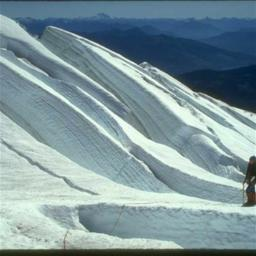

In [23]:
from IPython.display import Image
Image(filename='./data/mountain/cdmc181.jpg', width=600)

In [24]:
img_contains_mountain(process_img_path('./data/mountain/cdmc181.jpg'))

40960/35363 [==================================] - 0s 1us/step
[('n09193705', 'alp', 0.78818536), ('n09468604', 'valley', 0.0799365), ('n04228054', 'ski', 0.069679774)]


0.0

In [ ]:
# looking at a couple examples here:

print(img_contains_mountain(process_img_path('./data/mountain/cdmc181.jpg')))
image.load_img('./data/mountain/cdmc181.jpg', target_size=(224,224))

In [ ]:
for i in ['mountain', 'forest']:
    for file in os.listdir('./data/'+i):
        if file[-3:] == 'jpg':
            print(img_contains_mountain(process_img_path(file)))
            image.load_img(file, target_size=(224,224))

In [ ]:
# Nice split method from Matthew Mauney

# 

# Resources and Stretch Goals

Stretch goals
- Enhance your code to use classes/functions and accept terms to search and classes to look for in recognizing the downloaded images (e.g. download images of parties, recognize all that contain balloons)
- Check out [other available pretrained networks](https://tfhub.dev), try some and compare
- Image recognition/classification is somewhat solved, but *relationships* between entities and describing an image is not - check out some of the extended resources (e.g. [Visual Genome](https://visualgenome.org/)) on the topic
- Transfer learning - using images you source yourself, [retrain a classifier](https://www.tensorflow.org/hub/tutorials/image_retraining) with a new category
- (Not CNN related) Use [piexif](https://pypi.org/project/piexif/) to check out the metadata of images passed in to your system - see if they're from a national park! (Note - many images lack GPS metadata, so this won't work in most cases, but still cool)

Resources
- [Deep Residual Learning for Image Recognition](https://arxiv.org/abs/1512.03385) - influential paper (introduced ResNet)
- [YOLO: Real-Time Object Detection](https://pjreddie.com/darknet/yolo/) - an influential convolution based object detection system, focused on inference speed (for applications to e.g. self driving vehicles)
- [R-CNN, Fast R-CNN, Faster R-CNN, YOLO](https://towardsdatascience.com/r-cnn-fast-r-cnn-faster-r-cnn-yolo-object-detection-algorithms-36d53571365e) - comparison of object detection systems
- [Common Objects in Context](http://cocodataset.org/) - a large-scale object detection, segmentation, and captioning dataset
- [Visual Genome](https://visualgenome.org/) - a dataset, a knowledge base, an ongoing effort to connect structured image concepts to language